In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("uber.csv")
df = df.tail(5000)  # last 5000 rows


In [2]:
import datetime as dt
import geopy.distance


In [3]:
df["Distance"] = [
    round(
        geopy.distance.distance(
            (df.pickup_latitude[i], df.pickup_longitude[i]),
            (df.dropoff_latitude[i], df.dropoff_longitude[i]),
        ).km,
        2,
    )
    for i in df.index
]


In [4]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df["year"] = df.pickup_datetime.dt.year
df["month"] = df.pickup_datetime.dt.month
df["weekday"] = df.pickup_datetime.dt.weekday
df["hour"] = df.pickup_datetime.dt.hour


In [5]:
# Get the uber data from US only
df = df[
    (-130 < df["pickup_longitude"])
    & (df["pickup_longitude"] < -70)
    & (-130 < df["dropoff_longitude"])
    & (df["dropoff_longitude"] < -70)
    & (25 < df["pickup_latitude"])
    & (df["pickup_latitude"] < 50)
    & (25 < df["dropoff_latitude"])
    & (df["dropoff_latitude"] < 50)
    & (df["passenger_count"] < 50)
    & (df["passenger_count"] > 0)
    & (df["Distance"] < 50)
]
df


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,weekday,hour
195000,55302790,2012-07-26 09:23:00.000000225,6.1,2012-07-26 09:23:00+00:00,-73.987132,40.755337,-73.996287,40.762377,2,1.10,2012,7,3,9
195001,26964242,2012-02-02 13:47:06.0000002,6.1,2012-02-02 13:47:06+00:00,-73.981231,40.759506,-73.995765,40.765607,1,1.40,2012,2,3,13
195002,25327576,2014-08-05 19:20:44.0000005,9.0,2014-08-05 19:20:44+00:00,-73.991505,40.749937,-73.983554,40.763200,2,1.62,2014,8,1,19
195003,41403679,2009-07-28 06:32:28.0000001,7.3,2009-07-28 06:32:28+00:00,-73.991389,40.749750,-73.966417,40.762037,1,2.51,2009,7,1,6
195004,18705184,2015-04-23 22:19:58.0000002,6.5,2015-04-23 22:19:58+00:00,-73.988464,40.745937,-74.000999,40.730873,1,1.98,2015,4,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.11,2012,10,6,10
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.88,2014,3,4,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.87,2009,6,0,0
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.54,2015,5,2,14


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4876 entries, 195000 to 199999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Unnamed: 0         4876 non-null   int64              
 1   key                4876 non-null   object             
 2   fare_amount        4876 non-null   float64            
 3   pickup_datetime    4876 non-null   datetime64[ns, UTC]
 4   pickup_longitude   4876 non-null   float64            
 5   pickup_latitude    4876 non-null   float64            
 6   dropoff_longitude  4876 non-null   float64            
 7   dropoff_latitude   4876 non-null   float64            
 8   passenger_count    4876 non-null   int64              
 9   Distance           4876 non-null   float64            
 10  year               4876 non-null   int64              
 11  month              4876 non-null   int64              
 12  weekday            4876 non-null   int64 

In [7]:
df.describe()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,weekday,hour
count,4.876000e+03,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000
mean,2.757596e+07,11.665211,-73.974858,40.750556,-73.973326,40.751161,1.691345,3.434633,2011.730927,6.324651,3.025841,13.445447
std,1.609728e+07,10.985672,0.037841,0.035082,0.038964,0.038793,1.315507,3.859487,1.869209,3.450666,1.939640,6.554583
min,6.435000e+03,2.500000,-74.057028,40.350780,-74.382200,40.358117,1.000000,0.000000,2009.000000,1.000000,0.000000,0.000000
25%,1.330993e+07,6.000000,-73.992401,40.735429,-73.991447,40.734999,1.000000,1.260000,2010.000000,3.000000,1.000000,9.000000
50%,2.783828e+07,8.500000,-73.982033,40.753062,-73.980552,40.754016,1.000000,2.170000,2012.000000,6.000000,3.000000,14.000000
75%,4.154929e+07,12.500000,-73.968539,40.767650,-73.964771,40.768393,2.000000,3.930000,2013.000000,9.000000,5.000000,19.000000
max,5.541412e+07,230.000000,-73.334337,42.223633,-73.464092,42.273158,6.000000,38.080000,2015.000000,12.000000,6.000000,23.000000


In [8]:
df.columns


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'Distance', 'year', 'month',
       'weekday', 'hour'],
      dtype='object')

In [9]:
df[["fare_amount", "passenger_count"]]


,fare_amount,passenger_count
195000,6.1,2
195001,6.1,1
195002,9.0,2
195003,7.3,1
195004,6.5,1
...,...,...
199995,3.0,1
199996,7.5,1
199997,30.9,2
199998,14.5,1


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4876 entries, 195000 to 199999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Unnamed: 0         4876 non-null   int64              
 1   key                4876 non-null   object             
 2   fare_amount        4876 non-null   float64            
 3   pickup_datetime    4876 non-null   datetime64[ns, UTC]
 4   pickup_longitude   4876 non-null   float64            
 5   pickup_latitude    4876 non-null   float64            
 6   dropoff_longitude  4876 non-null   float64            
 7   dropoff_latitude   4876 non-null   float64            
 8   passenger_count    4876 non-null   int64              
 9   Distance           4876 non-null   float64            
 10  year               4876 non-null   int64              
 11  month              4876 non-null   int64              
 12  weekday            4876 non-null   int64 

In [11]:
df.describe()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,weekday,hour
count,4.876000e+03,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000
mean,2.757596e+07,11.665211,-73.974858,40.750556,-73.973326,40.751161,1.691345,3.434633,2011.730927,6.324651,3.025841,13.445447
std,1.609728e+07,10.985672,0.037841,0.035082,0.038964,0.038793,1.315507,3.859487,1.869209,3.450666,1.939640,6.554583
min,6.435000e+03,2.500000,-74.057028,40.350780,-74.382200,40.358117,1.000000,0.000000,2009.000000,1.000000,0.000000,0.000000
25%,1.330993e+07,6.000000,-73.992401,40.735429,-73.991447,40.734999,1.000000,1.260000,2010.000000,3.000000,1.000000,9.000000
50%,2.783828e+07,8.500000,-73.982033,40.753062,-73.980552,40.754016,1.000000,2.170000,2012.000000,6.000000,3.000000,14.000000
75%,4.154929e+07,12.500000,-73.968539,40.767650,-73.964771,40.768393,2.000000,3.930000,2013.000000,9.000000,5.000000,19.000000
max,5.541412e+07,230.000000,-73.334337,42.223633,-73.464092,42.273158,6.000000,38.080000,2015.000000,12.000000,6.000000,23.000000


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4876 entries, 195000 to 199999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Unnamed: 0         4876 non-null   int64              
 1   key                4876 non-null   object             
 2   fare_amount        4876 non-null   float64            
 3   pickup_datetime    4876 non-null   datetime64[ns, UTC]
 4   pickup_longitude   4876 non-null   float64            
 5   pickup_latitude    4876 non-null   float64            
 6   dropoff_longitude  4876 non-null   float64            
 7   dropoff_latitude   4876 non-null   float64            
 8   passenger_count    4876 non-null   int64              
 9   Distance           4876 non-null   float64            
 10  year               4876 non-null   int64              
 11  month              4876 non-null   int64              
 12  weekday            4876 non-null   int64 

In [13]:
df.nunique().sort_values()


passenger_count         6
year                    7
weekday                 7
month                  12
hour                   24
fare_amount           282
Distance             1068
pickup_longitude     4675
pickup_latitude      4698
dropoff_longitude    4705
dropoff_latitude     4717
pickup_datetime      4872
Unnamed: 0           4876
key                  4876
dtype: int64

In [14]:
df[["fare_amount", "Distance"]]


,fare_amount,Distance
195000,6.1,1.10
195001,6.1,1.40
195002,9.0,1.62
195003,7.3,2.51
195004,6.5,1.98
...,...,...
199995,3.0,0.11
199996,7.5,1.88
199997,30.9,12.87
199998,14.5,3.54


In [15]:
a = df.groupby("year")["fare_amount"].sum()
a


year
2009     7802.99
2010     7912.80
2011     8146.80
2012     8798.00
2013     9081.84
2014    10695.18
2015     4441.96
Name: fare_amount, dtype: float64

In [16]:
a.index


Int64Index([2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype='int64', name='year')

Text(0.5, 1.0, 'Change of Total Fare from 2009 to 2015')

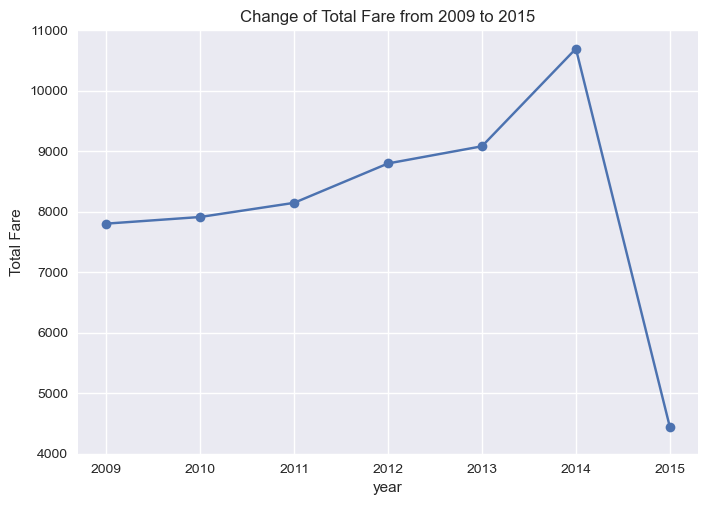

In [21]:
# Q1: Change of Total Fare from 2009 to 2015
b = pd.Series(a, a.index)
fig, ax = plt.subplots()
plt.style.use("seaborn")
plt.ylim(4000, 11000)
b.plot(ax=ax, linestyle="solid", marker="o")
ax.set_ylabel("Total Fare")
ax.set_title("Change of Total Fare from 2009 to 2015")


##### Conclusion: There is a steady growth from 2009-2015, with a sudden dip in 2015.
##### Reason: It is mainly influenced by the domestic market pattern and national conditions in USA as more and more taxi-apps emerge.

In [18]:
c = df.groupby("weekday")["fare_amount"].mean()
daily_fare = []
for i in c:
    daily_fare.append(i)
daily_fare


[11.295384615384615,
 10.950913242009133,
 11.580364372469635,
 12.303665730337077,
 11.830038560411312,
 11.166995940460081,
 12.568986928104575]

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thu'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

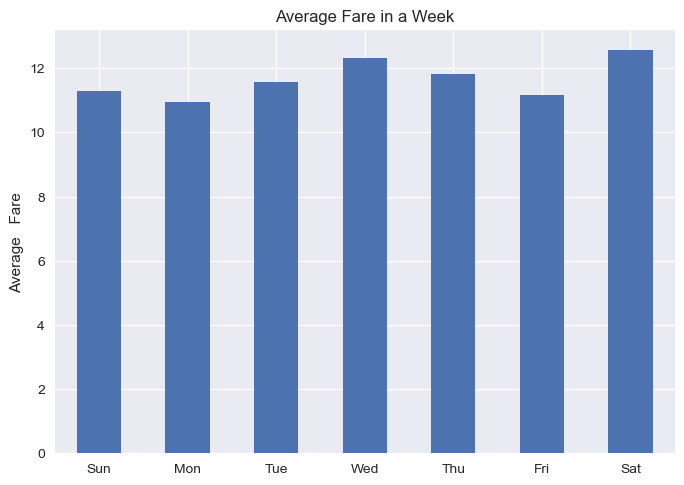

In [19]:
# Q2: Distribution of Average Fare in a week and in which day the average fare is the highest?
day = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
d = pd.Series(daily_fare, day)
fig, ax1 = plt.subplots()
d.plot.bar(ax=ax1)
ax1.set_ylabel("Average   Fare")
ax1.set_title("Average Fare in a Week")
plt.xticks(rotation=0)


Text(0, 0.5, 'Amount')

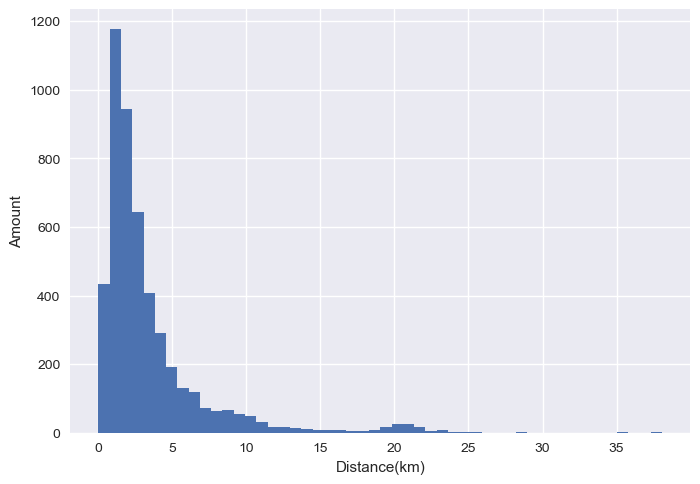

In [20]:
# Q3: Distribution of distance of each trip
fig, ax2 = plt.subplots()
df.Distance.hist(bins=50)
plt.xlabel("Distance(km)")
plt.ylabel("Amount")
